## Image Classification with Tensorflow

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Load Data

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip),'cats_and_dogs_filtered')

In [3]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [4]:
train_cats_dir = os.path.join(train_dir, 'cats')
validation_cats_dir = os.path.join(validation_dir, 'cats')

train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val  = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_validation = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_validation)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [6]:
# preprocess variables
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [7]:
train_image_generator = ImageDataGenerator(rescale=1./255)
val_image_generator = ImageDataGenerator(rescale=1./255)

#  load images from the disk, applies rescaling, and resize the images into the required dimensions.
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [8]:
val_data_gen = val_image_generator.flow_from_directory(batch_size=batch_size,
                                                       directory=validation_dir,
                                                       shuffle=True,
                                                       target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                       class_mode='binary')

Found 1000 images belonging to 2 classes.


In [10]:
sample_training_images, _ = next(train_data_gen)

In [11]:
# visualize training image
import matplotlib.pyplot as plt

def plot_image(images_arr):
    fig,axes = plt.subplots(1,5, figsize=(20,20))
    axes = axes.flatten()
    for im,ax in zip(images_arr, axes):
        ax.imshow(im)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

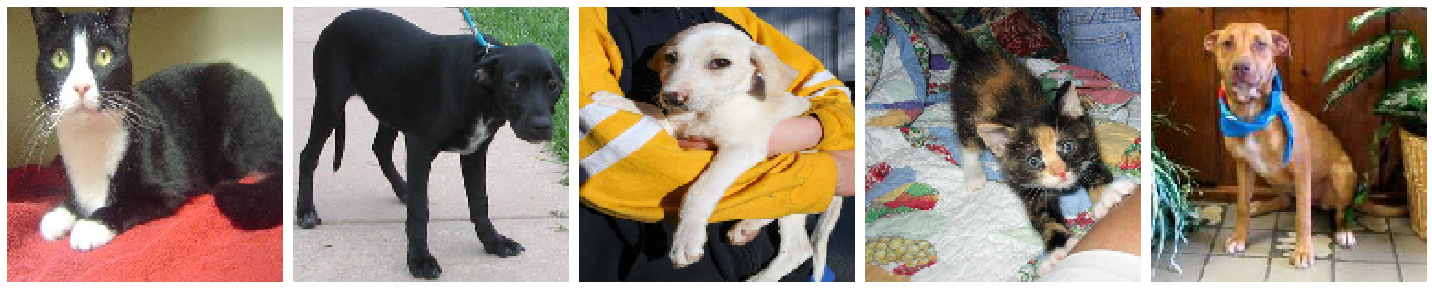

In [13]:
plot_image(sample_training_images[:5])

### Create the Model

In [14]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [17]:
# train
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=total_train // batch_size,
                              epochs=epochs,
                              validation_data= val_data_gen,
                              validation_steps= total_validation // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 15 steps, validate for 7 steps
Epoch 1/15
15/15 [==============================] - 44s 3s/step - loss: 1.2376 - accuracy: 0.4877 - val_loss: 0.6934 - val_accuracy: 0.5056
Epoch 2/15
15/15 [==============================] - 39s 3s/step - loss: 0.6910 - accuracy: 0.4968 - val_loss: 0.6885 - val_accuracy: 0.5056
Epoch 3/15
15/15 [==============================] - 40s 3s/step - loss: 0.6806 - accuracy: 0.5166 - val_loss: 0.6668 - val_accuracy: 0.5089
Epoch 4/15
15/15 [==============================] - 41s 3s/step - loss: 0.6519 - accuracy: 0.5636 - val_loss: 0.6371 - val_accuracy: 0.6172
Epoch 5/15
15/15 [==============================] - 40s 3s/step - loss: 0.6187 - accuracy: 0.6181 - val_loss: 0.6253 - val_accuracy: 0.6049
Epoch 6/15
15/15 [==============================] - 40s 3s/step - loss: 0.5893 - accuracy: 0.6677 - val_loss: 0.6194 - val_accuracy: 

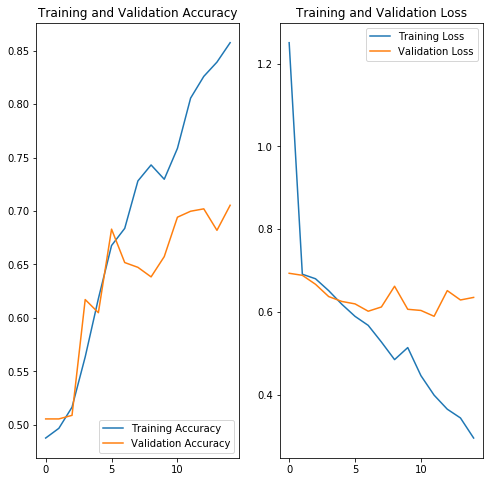

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()